In [0]:







import ssl
import zipfile, urllib.request, shutil


ssl._create_default_https_context = ssl._create_unverified_context


url = 'https://sct.insofe.edu.in/media/question_img_upload/CSE7321c_Deep_Learning%20and%20Text_Mining_CUTe-1540270465813.zip'
file_name = 'myzip.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

In [4]:
!pip install imblearn

In [0]:
#import libraries
import re
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE # Oversampling


# We will use the following Scikit-Learn classes for the activity
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#from sklearn.feature_extrection.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from google.colab import files

In [6]:
#use NLTK libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.stem import WordNetLemmatizer

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
import seaborn as sns

In [0]:
train_data = pd.read_csv("CSE7321c_Deep_Learning and Text_Mining_CUTe/train.csv",encoding='latin-1')
test_data= pd.read_csv("CSE7321c_Deep_Learning and Text_Mining_CUTe/test.csv",encoding='latin-1')

In [9]:
train_data.head()

,ID,reviewText,overall
0,1,These are so wonderful to have in the car in t...,5
1,2,XL fits perfect on me over armored riding jack...,5
2,3,Since I had just noticed my wiper blades neede...,3
3,4,I am very satisfied with G110v2. It is comfor...,5
4,5,This amp did a good job for its rating. It was...,3


In [10]:
train_data.shape

(77075, 3)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77075 entries, 0 to 77074
Data columns (total 3 columns):
ID            77075 non-null int64
reviewText    77049 non-null object
overall       77075 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [12]:
train_data['overall'].value_counts()

5    46317
4    16997
3     7676
2     3241
1     2844
Name: overall, dtype: int64

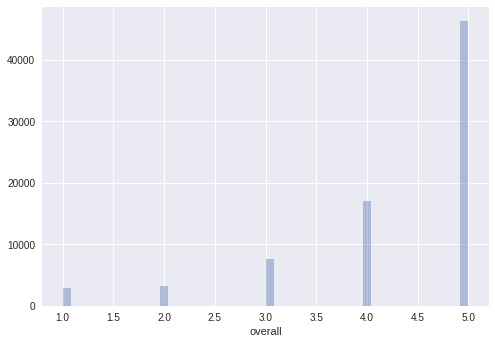

In [13]:
sns.distplot(train_data['overall'], kde=False);

In [0]:
cleanup_re = re.compile('[^a-z]+')
def review_to_words( raw_review ):
        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review)) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]
    sentence =  " ".join( meaningful_words )
    sentence = str(sentence)
    sentence = re.sub(r'\s+',' ',sentence) #\s is for white spaces
    sentence = re.sub('[\d]','',sentence)  #\d is for digits
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [15]:
num_review = train_data["reviewText"].size

print(num_review)


77075


In [16]:
num_reviews_test = test_data["reviewText"].size

print(num_reviews_test)

4057


In [17]:
review_clean_train=[]

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range(num_review):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    review_clean_train.append(review_to_words(train_data['reviewText'][i]))

# print(clean_reviews)
 
print (review_clean_train[:2])


['wonderful car winter getting one another color brand decided pick second blanket kids use traveling minnesota gets extremely cold everyone always fighting thermostat set travel electric blankets car everyone keep warm want blanket works well one gets warm fast works exactly like household electric blanket pleased well worked bought gifts people christmas year big one knew even made thing finally warm toasty want', 'xl fits perfect armored riding jacket lbs rush putting complainingabout ripping like others wear pants daily cool mornings never worry rain stay dry take time zip correctly velcro properly sinch needs sinched love mine days arrive ordering']


In [18]:
# Initialize an empty list to hold the clean reviews

review_clean_test=[]

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range(num_reviews_test):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    review_clean_test.append(review_to_words( test_data["reviewText"][i] ))
    

#print(clean_reviews)

print(review_clean_test[0])

idea gardening lots hanging baskets container plants patio enjoy soil perfect fairly lightweight like hauling backyard delivered near problem ithot might large bag soil ordered bags far container plants seem begrowing well hanging basket plants well another two weeks looking perfect andfull flowers nice could get delivered car therefore real problem getting plants soilhome use spring


In [0]:
labels_train = list(train_data['overall'].values)




```
*#**Word Embedding with Keras**
**bold text**Keras Embedding Layer Keras offers an Embedding layer that can be used for neural networks on text data. This data preparation step can be performed using the Tokenizer API also provided with Keras.

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words.* 
```



In [20]:
from numpy import zeros
from numpy import asarray

import pandas as pd

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding


from keras.utils import np_utils, normalize

Using TensorFlow backend.


In [21]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(review_clean_train)

#print (t.word_index)
#+1 is for 
vocab_size = len(t.word_index) + 1
print (vocab_size)

73647


In [22]:
'''
t.fit_on_texts(review_clean_test)
print (t.word_index)
vocab_size_test = len(t.word_index) + 1
print (vocab_size_test)

'''

'\nt.fit_on_texts(review_clean_test)\nprint (t.word_index)\nvocab_size_test = len(t.word_index) + 1\nprint (vocab_size_test)\n\n'

In [0]:
# integer encode the documents
encoded_review_train = t.texts_to_sequences(review_clean_train)

# Test
encoded_review_test = t.texts_to_sequences(review_clean_test)


In [24]:
print(review_clean_train[0:2])
print(encoded_review_train[0:2])

['wonderful car winter getting one another color brand decided pick second blanket kids use traveling minnesota gets extremely cold everyone always fighting thermostat set travel electric blankets car everyone keep warm want blanket works well one gets warm fast works exactly like household electric blanket pleased well worked bought gifts people christmas year big one knew even made thing finally warm toasty want', 'xl fits perfect armored riding jacket lbs rush putting complainingabout ripping like others wear pants daily cool mornings never worry rain stay dry take time zip correctly velcro properly sinch needs sinched love mine days arrive ordering']
[[468, 36, 567, 126, 1, 72, 425, 417, 392, 353, 181, 6179, 322, 8, 3336, 7656, 159, 575, 774, 335, 82, 1826, 5419, 74, 1015, 442, 19700, 36, 335, 45, 926, 49, 6179, 35, 6, 1, 159, 926, 350, 35, 437, 2, 3197, 442, 6179, 646, 6, 192, 100, 6180, 55, 1891, 109, 113, 1, 870, 19, 38, 64, 381, 926, 19701, 49], [5118, 386, 147, 20908, 2432, 39

In [25]:
count = 0
for i in encoded_review_train:
  if len(i) > count:
    count = len(i)
  else:
    count = count
count    

1627

The sequences have different lengths and Keras prefers inputs to be vectorized and all inputs to have the same length. We will pad all input sequences to have the length of 4. Again, we can do this with a built in Keras's pad_sequences() function.

pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

If you rather want to pad to the end of the sequences you can set padding='post'.

If you want to specify the maximum length of each sequence you can use the maxlen argument. This will truncate all sequences longer than maxlen.

In [26]:
# pad documents to a max length of 1627 words
max_length = 1627
padded_review_train = pad_sequences(encoded_review_train, maxlen=max_length, padding='post')
print(padded_review_train)
print ('\n')
print(padded_review_train.shape)
print ('\n')



# On Test
padded_review_test = pad_sequences(encoded_review_test, maxlen=max_length, padding='post')
print(padded_review_test)
print ('\n')
print(padded_review_test.shape)


[[ 468   36  567 ...    0    0    0]
 [5118  386  147 ...    0    0    0]
 [  78  652  514 ...    0    0    0]
 ...
 [  18  233  206 ...    0    0    0]
 [  20  210  471 ...    0    0    0]
 [   4  159   23 ...    0    0    0]]


(77075, 1627)


[[ 285 1647  422 ...    0    0    0]
 [ 130 7104  117 ...    0    0    0]
 [9383  215  999 ...    0    0    0]
 ...
 [ 578  191 2607 ...    0    0    0]
 [  18    4   82 ...    0    0    0]
 [   6  108   25 ...    0    0    0]]


(4057, 1627)


In [27]:
padded_norm_train = normalize(padded_review_train)
print(padded_norm_train)

[[0.01441907 0.00110916 0.01746926 ... 0.         0.         0.        ]
 [0.07300384 0.00550596 0.00209683 ... 0.         0.         0.        ]
 [0.00134849 0.01127197 0.00888618 ... 0.         0.         0.        ]
 ...
 [0.00057483 0.00744083 0.00657859 ... 0.         0.         0.        ]
 [0.0002365  0.00248326 0.0055696  ... 0.         0.         0.        ]
 [0.00037719 0.0149934  0.00216886 ... 0.         0.         0.        ]]


In [28]:
padded_norm_test = normalize(padded_review_test)
print(padded_norm_test)

[[2.46832032e-02 1.42642932e-01 3.65484623e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.71598157e-03 5.30941023e-01 8.74438341e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.83701268e-01 4.20929048e-03 1.95585172e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.65751082e-02 2.53042313e-02 3.45382884e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.71464166e-04 1.49214259e-04 3.05889231e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.07649203e-03 1.93768565e-02 4.48538345e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


**SMOTING**

In [29]:
# Reshape Y_train
labels_np_train = np_utils.to_categorical(labels_train)
labels_np_train


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(padded_norm_train, np.array(labels_train) , test_size=0.30, random_state=42)

In [31]:
print (X_train.shape)
print (Y_train.shape)
print('\n')
print (X_val.shape)
print (Y_val.shape)

(53952, 1627)
(53952,)


(23123, 1627)
(23123,)


In [32]:
np.unique(Y_train, return_counts= True)

(array([1, 2, 3, 4, 5]), array([ 2019,  2306,  5411, 11819, 32397]))

In [0]:
#sm = SMOTE(ratio={1:2500, 2:2600, 3:5700,4:13000},kind='borderline1',random_state=42) # lets reduce the imbalance 

#X_res, Y_res = sm.fit_sample(X_train, Y_train)

In [34]:
print (X_train.shape)
print (Y_train.shape)
print('\n')
print (X_val.shape)
print (Y_val.shape)

(53952, 1627)
(53952,)


(23123, 1627)
(23123,)


In [35]:
np.unique(Y_train, return_counts= True)

(array([1, 2, 3, 4, 5]), array([ 2019,  2306,  5411, 11819, 32397]))

In [0]:
from keras.layers import Dropout

The Embedding has a vocabulary of 15 and an input length of 4. We will choose a small embedding space of 8 dimensions.

The model is a simple binary classification model.

Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. We flatten this to a one 32-element vector to pass on to the Dense output layer.



In [0]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length)) # 128 is vector size
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))
model.add(Dropout(0.25))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# fit the model
model.fit(padded_norm_train, labels_np_train, epochs=3, verbose=1,validation_split=0.3)

Train on 53952 samples, validate on 23123 samples
Epoch 1/3
53952/53952 [==============================] - 103s 2ms/step - loss: 0.9442 - acc: 0.8543 - val_loss: 0.3204 - val_acc: 0.8333
Epoch 2/3
53952/53952 [==============================] - 100s 2ms/step - loss: 0.9165 - acc: 0.8579 - val_loss: 0.3113 - val_acc: 0.8681
Epoch 3/3
53952/53952 [==============================] - 101s 2ms/step - loss: 0.9127 - acc: 0.8585 - val_loss: 0.3121 - val_acc: 0.8681


In [40]:
# evaluate the model
loss, accuracy = model.evaluate(padded_norm_train, labels_np_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

77075/77075 [==============================] - 15s 189us/step
Accuracy: 86.697807


In [0]:
y_predict_test = model.predict_classes(padded_norm_test)

In [42]:
np.unique(y_predict_test)

array([5])

In [0]:
submission = pd.DataFrame(y_predict_test, columns = ['overall'], index = test_data['ID'])

In [0]:
submission.to_csv('submission.csv')

In [0]:
files.download("submission.csv")

**model 2 with different loss function**

In [0]:
# define the model
model2 = Sequential()
model2.add(Embedding(vocab_size, 128, input_length=max_length)) # 128 is vector size
model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))

model2.add(Dense(6, activation='softmax'))

In [47]:
X_val.shape

(23123, 1627)

In [48]:
# compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
model2.fit(padded_norm_train, labels_np_train, epochs=3, verbose=1,validation_split=0.3)



# evaluate the model
loss, accuracy = model2.evaluate(padded_norm_train, labels_np_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Train on 53952 samples, validate on 23123 samples
Epoch 1/3
53952/53952 [==============================] - 99s 2ms/step - loss: 1.1486 - acc: 0.5984 - val_loss: 1.1313 - val_acc: 0.6044
Epoch 2/3
53952/53952 [==============================] - 98s 2ms/step - loss: 1.1321 - acc: 0.5995 - val_loss: 1.1281 - val_acc: 0.6044
Epoch 3/3
77075/77075 [==============================] - 12s 156us/step
Accuracy: 60.093416


In [49]:
# evaluate the model
loss, accuracy = model2.evaluate(padded_norm_train, labels_np_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

77075/77075 [==============================] - 12s 157us/step
Accuracy: 60.093416


In [0]:
y_predict2_test = model2.predict_classes(padded_norm_test)

In [51]:
np.unique(y_predict2_test)

array([5])

In [0]:
submission_2 = pd.DataFrame(y_predict2_test, columns = ['overall'], index = test_data['ID'])




In [0]:
submission_2.to_csv('submission_2.csv')

In [0]:
files.download("submission_2.csv")

**Using Pre-Trained GloVe Embedding**

In [55]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32') #Convert the input to an array.
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 14 word vectors.


In [0]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50)) #Return a new array of given shape and type, filled with zeros.
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [57]:
print (embedding_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# define model
model3 = Sequential()
model3.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=1627, trainable=False))
# the model will take as input an integer matrix of size (batch, input_length).
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(6, activation='softmax'))

In [0]:
 # compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [60]:
# summarize the model
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1627, 50)          3682350   
_________________________________________________________________
flatten_3 (Flatten)          (None, 81350)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               10412928  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
__________

In [61]:
embedding_matrix[i] = embedding_vector# fit the model
model3.fit(padded_norm_train, labels_np_train, epochs=3, verbose=1)   

Epoch 1/3
77075/77075 [==============================] - 49s 634us/step - loss: 0.3481 - acc: 0.8482
Epoch 2/3
77075/77075 [==============================] - 48s 626us/step - loss: 0.3128 - acc: 0.8670
Epoch 3/3
77075/77075 [==============================] - 48s 626us/step - loss: 0.3106 - acc: 0.8670


In [62]:
# evaluate the model
loss, accuracy = model3.evaluate(padded_norm_train, labels_np_train, verbose=1)
print('Accuracy: %f' % (accuracy*100))

77075/77075 [==============================] - 10s 124us/step
Accuracy: 86.697807


In [0]:
y_predict3_test = model3.predict_classes(padded_norm_test)

In [64]:
np.unique(y_predict3_test)

array([5])

In [0]:
submission_3 = pd.DataFrame(y_predict3_test, columns = ['overall'], index = test_data['ID'])

In [0]:
submission_3.to_csv('submission_3.csv')

In [0]:
files.download("submission_3.csv")